# LEGO Exploration: Data Analysis and Visualization with Python 

## The Project Goal

The project aims to extract valuable insights from the LEGO dataset, exploring LEGO products, themes, prices and correlations between features.

## About Dataset

This dataset was downloaded from the Maven Analytics website and contains information about all LEGO sets and other products, LEGO Theme Groups, Themes, Categories, product characteristics like recommended Age, Release Year, number of Pieces, Minifigures, prices  and other.

## Content 

| Feature           | Description                                     |
| ------------------| ------------------------------------------------|
| set_id            | Official LEGO item number                       |
| name              | Name of the LEGO set                            |
| year              | Release year                                    |
| theme             | LEGO theme the set belongs to                   |
| subtheme          | Subtheme within the theme                       |
| themeGroup        | Overall group the theme belongs to              |
| category          | Type of set                                     |
| pieces            | Number of pieces in the set                     |
| minifigs          | Number of mini figures included in the set      |
| agerange_min      | Minimum age recommended                         |
| US_retailPrice    | US retail price at launch                       |
| bricksetURL       | URL for the set on brickset.com                 |
| thumbnailURL      | Small image of the set                          |
| imageURL          | Full size image of the set                      | 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_palette(palette='Set1')
sns.set_style('darkgrid')

In [3]:
file_name = 'lego_sets.csv'

In [4]:
df = pd.read_csv(file_name)

In [5]:
df.head()

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
0,1-8,Small house set,1970,Minitalia,NaN,Vintage,Normal,67.0,NaN,NaN,NaN,https://brickset.com/sets/1-8,https://images.brickset.com/sets/small/1-8.jpg,https://images.brickset.com/sets/images/1-8.jpg
1,2-8,Medium house set,1970,Minitalia,NaN,Vintage,Normal,109.0,NaN,NaN,NaN,https://brickset.com/sets/2-8,https://images.brickset.com/sets/small/2-8.jpg,https://images.brickset.com/sets/images/2-8.jpg
2,3-6,Medium house set,1970,Minitalia,NaN,Vintage,Normal,158.0,NaN,NaN,NaN,https://brickset.com/sets/3-6,https://images.brickset.com/sets/small/3-6.jpg,https://images.brickset.com/sets/images/3-6.jpg
3,4-4,Large house set,1970,Minitalia,NaN,Vintage,Normal,233.0,NaN,NaN,NaN,https://brickset.com/sets/4-4,https://images.brickset.com/sets/small/4-4.jpg,https://images.brickset.com/sets/images/4-4.jpg
4,4-6,Mini House and Vehicles,1970,Samsonite,Model Maker,Vintage,Normal,NaN,NaN,NaN,NaN,https://brickset.com/sets/4-6,NaN,NaN


In [6]:
print('Number of rows: ' + str(df.shape[0]))

Number of rows: 18457


In [7]:
print('Number of columns: ' + str(df.shape[1]))

Number of columns: 14


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   set_id          18457 non-null  object 
 1   name            18457 non-null  object 
 2   year            18457 non-null  int64  
 3   theme           18457 non-null  object 
 4   subtheme        14901 non-null  object 
 5   themeGroup      18455 non-null  object 
 6   category        18457 non-null  object 
 7   pieces          14533 non-null  float64
 8   minifigs        8399 non-null   float64
 9   agerange_min    6787 non-null   float64
 10  US_retailPrice  6982 non-null   float64
 11  bricksetURL     18457 non-null  object 
 12  thumbnailURL    17451 non-null  object 
 13  imageURL        17451 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.0+ MB


## Data Preparation

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

set_id                0
name                  0
year                  0
theme                 0
subtheme           3556
themeGroup            2
category              0
pieces             3924
minifigs          10058
agerange_min      11670
US_retailPrice    11475
bricksetURL           0
thumbnailURL       1006
imageURL           1006
dtype: int64

Replacing missing values.

In [11]:
df['subtheme'].fillna('Unspecified', inplace=True)
df['themeGroup'].fillna('Unspecified', inplace=True)

Dropping columns that will not be used in the analysis.

In [12]:
df.drop(columns=['bricksetURL', 'thumbnailURL', 'imageURL'], inplace=True)

In [13]:
df.isnull().sum()

set_id                0
name                  0
year                  0
theme                 0
subtheme              0
themeGroup            0
category              0
pieces             3924
minifigs          10058
agerange_min      11670
US_retailPrice    11475
dtype: int64

Columns: 'pieces', 'minifigs', 'agerange_min', and 'US_retailPrice' contain large percentage of missing values, those values will be treated later in the analysis. 

## Summary Statistics 

In [14]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,year,pieces,minifigs,agerange_min,US_retailPrice
count,18457.00,14533.00,8399.00,6787.00,6982.00
mean,2007.96,226.47,2.66,6.64,37.53
std,11.95,469.99,2.90,2.78,54.38
min,1970.00,0.00,1.00,1.00,1.49
25%,2001.00,23.00,1.00,5.00,9.99
50%,2011.00,70.00,2.00,6.00,19.99
75%,2017.00,242.00,3.00,8.00,39.99
max,2022.00,11695.00,80.00,18.00,849.99


In [15]:
df.describe(include = ['object'])

,set_id,name,theme,subtheme,themeGroup,category
count,18457,18457,18457,18457,18457,18457
unique,18457,15374,154,896,17,7
top,1-8,Bonus/Value Pack,Gear,Unspecified,Miscellaneous,Normal
freq,1,165,2832,3556,5891,12757


Top product, theme, themeGroup and category by count:

In [16]:
df.describe(include=['object']).loc['top', ['name', 'theme', 'themeGroup', 'category']].to_frame()

,top
name,Bonus/Value Pack
theme,Gear
themeGroup,Miscellaneous
category,Normal


##  Univariate Analysis

### Numerical Variables: 

### Pieces 

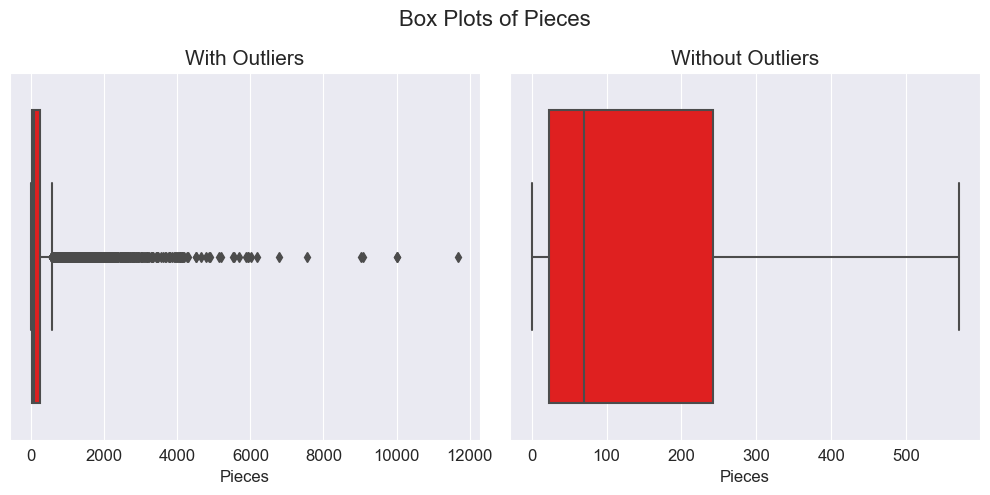

In [17]:
pieces_data = df.dropna(subset=['pieces'])

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(x=pieces_data['pieces'], ax=axes[0], color='#FF0000')
axes[0].set_title('With Outliers', fontsize=15)
axes[0].set_xlabel('Pieces', fontsize=12)
axes[0].tick_params(labelsize=12)

sns.boxplot(x=pieces_data['pieces'], ax=axes[1], showfliers=False, color='#FF0000')
axes[1].set_title('Without Outliers', fontsize=15)
axes[1].set_xlabel("Pieces", fontsize=12)
axes[1].tick_params(labelsize=12)

plt.suptitle('Box Plots of Pieces', fontsize=16)

plt.tight_layout()
plt.show()


In [18]:
pieces_stat = {
    'mean': 'mean',
    'median': 'median',
    'max': 'max',
}
pieces_result = round(pieces_data['pieces'].agg(pieces_stat), 2)
pieces_result.to_frame()

,pieces
mean,226.47
median,70.00
max,11695.00


In [19]:
print("The product with the highest number of Pieces: " + df.at[df['pieces'].idxmax(), 'name'] + ", # of pieces: " + str(int(round(df['pieces'].max(), 0))))


The product with the highest number of Pieces: World Map, # of pieces: 11695


### Minifigs

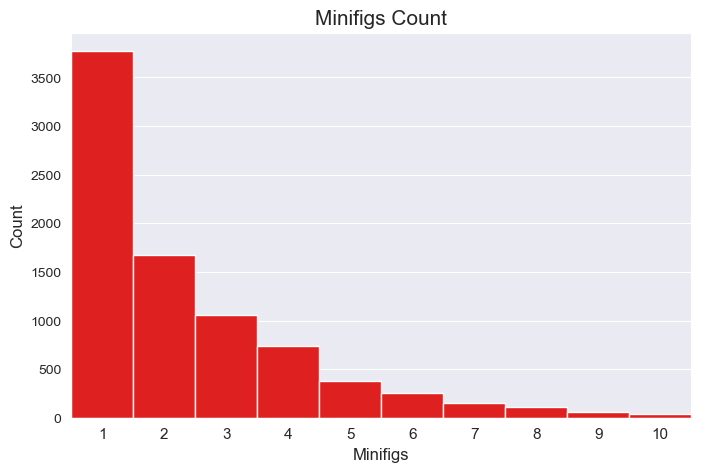

In [20]:
plt.figure(figsize=(8, 5))
minifigs_data = df['minifigs'].dropna().astype(int)
minifigs_data_counts = minifigs_data.value_counts().head(10)
sns.countplot(x=minifigs_data, order=minifigs_data_counts.index, color='#FF0000', width=1)
plt.title("Minifigs Count", fontsize=15)
plt.xlabel("Minifigs", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.show()


In [21]:
minifigs_stat = {
    'mean': 'mean',
    'median': 'median',
    'max': 'max',
}
minifigs_result = round(minifigs_data.agg(minifigs_stat), 2)
minifigs_result.to_frame()


,minifigs
mean,2.66
median,2.00
max,80.00


In [22]:
print("The product with the highest number of Minifigs: " + df.at[df['minifigs'].idxmax(), 'name'] + ", # of minifigs: " + str(int(round(df['minifigs'].max(), 0))))


The product with the highest number of Minifigs: Figure collection, # of minifigs: 80


### Age 

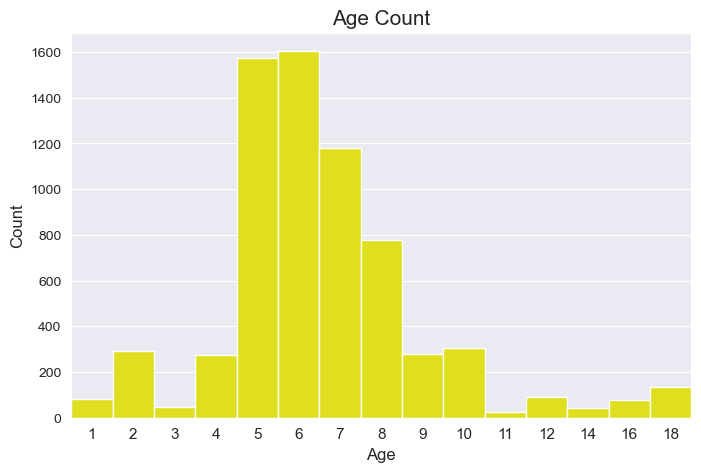

In [23]:
plt.figure(figsize=(8, 5))
age_data = df['agerange_min'].dropna().astype(int)
age_data_counts = age_data.value_counts().sort_index(0)
sns.countplot(x=age_data, order=age_data_counts.index, color='#FFFF00', width = 1)
plt.title("Age Count", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.show()

In [24]:
age_stat = {
    'mean': 'mean',
    'median': 'median',
    }
age_result = round(age_data.agg(age_stat), 2)
age_result.to_frame()

,agerange_min
mean,6.64
median,6.00


### Price, USD 

In [25]:
price_data = df.dropna(subset=['US_retailPrice'])

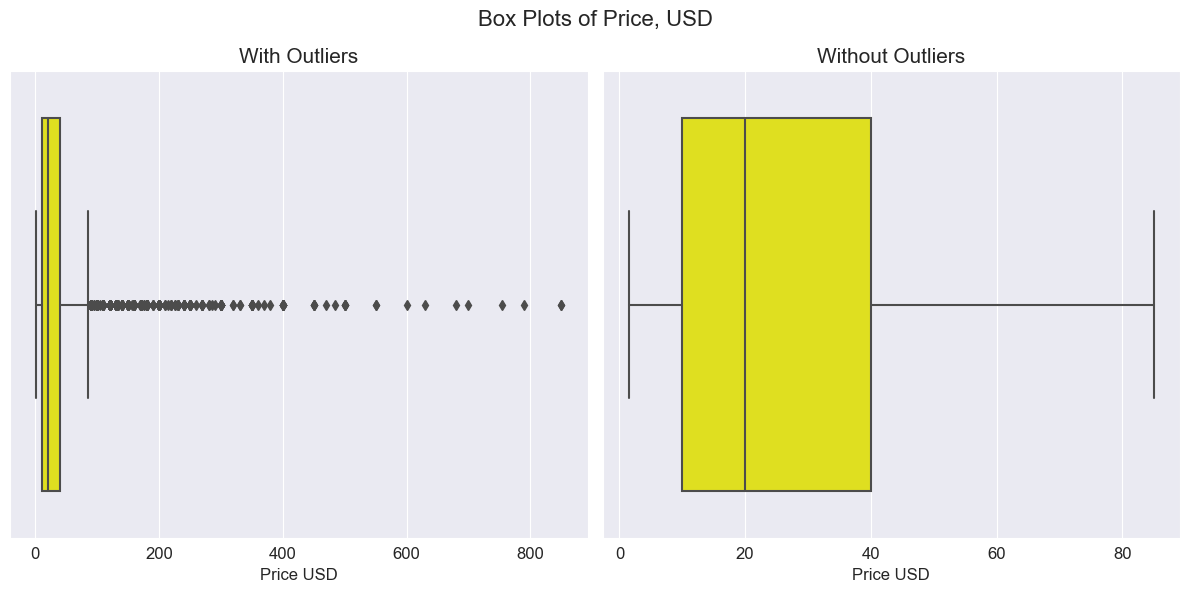

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=price_data['US_retailPrice'], ax=axes[0], color = '#FFFF00')
axes[0].set_title('With Outliers', fontsize=15)
axes[0].set_xlabel('Price USD', fontsize=12)
axes[0].tick_params(labelsize=12)

sns.boxplot(x=price_data['US_retailPrice'], ax=axes[1], showfliers=False, color = '#FFFF00')
axes[1].set_title('Without Outliers', fontsize=15)
axes[1].set_xlabel('Price USD', fontsize=12)
axes[1].tick_params(labelsize=12)

plt.suptitle('Box Plots of Price, USD', fontsize=16)

plt.tight_layout()
plt.show()

In [27]:
price_stat = {
    'mean': 'mean',
    'median': 'median',
    'max': 'max',
}
price_result = round(price_data['US_retailPrice'].agg(price_stat), 2)
price_result.to_frame()

,US_retailPrice
mean,37.53
median,19.99
max,849.99


In [28]:
print("The product with the highest Price, USD: " + df.at[df['US_retailPrice'].idxmax(), 'name'] + "; Price: " + str(df['US_retailPrice'].max()))


The product with the highest Price, USD: Millennium Falcon; Price: 849.99


### Name 

In [29]:
df['name'].nunique()

15374

In [30]:
df.shape[0] - df['name'].nunique()

3083

In [31]:
non_unique_counts = df['name'].value_counts()[df['name'].value_counts() > 1]
non_unique_counts.head(20)

Bonus/Value Pack          165
Helicopter                 36
Basic Building Set, 3+     32
Basic Building Set, 5+     32
Basic Set                  25
Basic Building Set         24
Fire Station               19
Tractor                    18
City Advent Calendar       18
Tow Truck                  17
Fire Truck                 17
Police Station             17
Super Pack 3-in-1          16
Batman                     15
Police Car                 15
Police Helicopter          15
Ambulance                  14
Cole                       14
Duplo Bucket               13
Go-Kart                    13
Name: name, dtype: int64

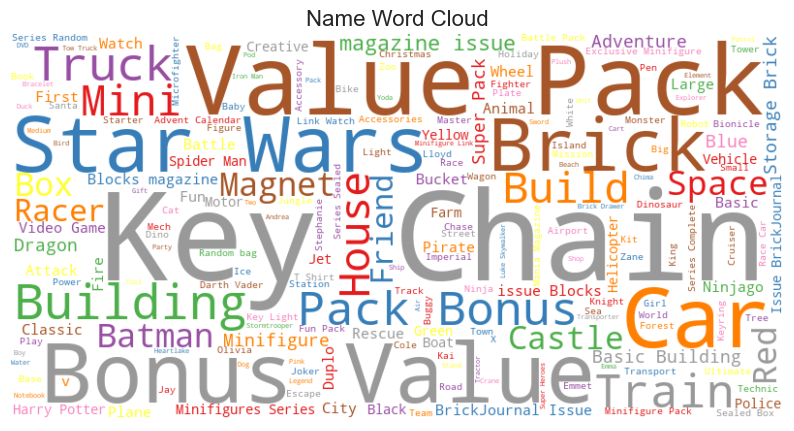

In [32]:
stopwords = set(STOPWORDS)
stopwords.update(['LEGO', 'Set'])

text = ' '.join(df['name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set1', stopwords = stopwords).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Name Word Cloud', fontsize=16)
plt.axis('off')
plt.show()

### Year 

In [33]:
df['year'].nunique()

53

In [34]:
df['year'].min()

1970

In [35]:
df['year'].max()

2022

### Categorical Variables: 

### Theme and Subtheme 

In [36]:
df['theme'].nunique()

154

In [37]:
df['theme'].value_counts().head(20)

Gear                       2832
Duplo                      1275
Star Wars                   863
City                        798
Collectable Minifigures     772
Town                        648
Books                       631
Promotional                 588
Creator                     509
Friends                     507
Technic                     464
Ninjago                     463
Basic                       416
Bionicle                    389
Service Packs               386
Space                       324
Education                   300
Castle                      281
Racers                      248
Marvel Super Heroes         237
Name: theme, dtype: int64

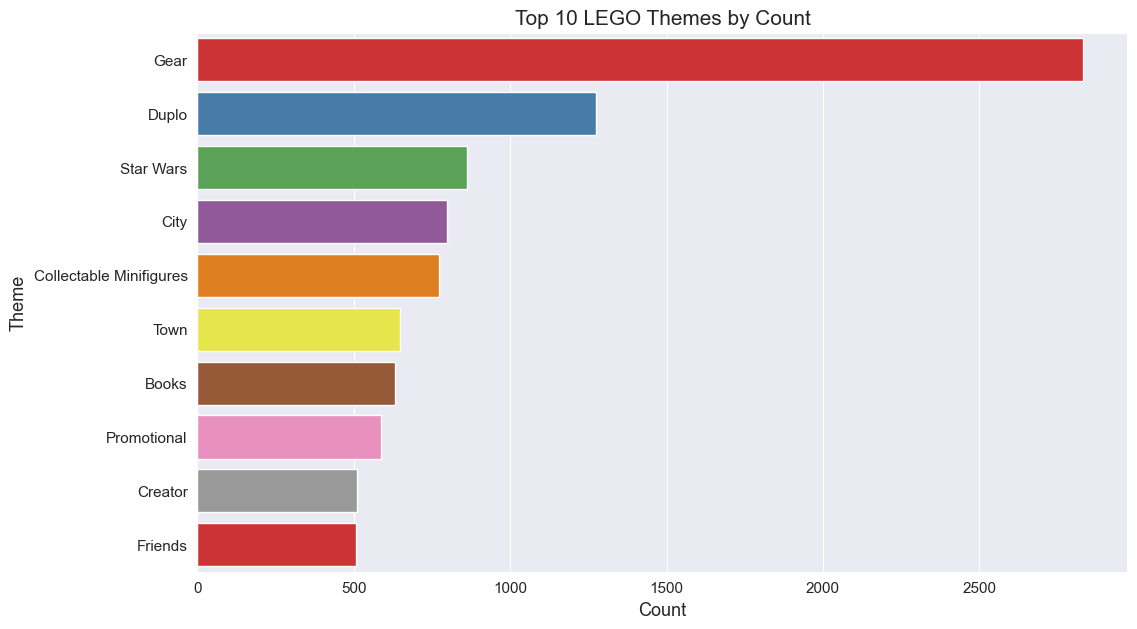

In [38]:
Top_themes = df['theme'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.countplot(data=df, y='theme', order=Top_themes.index, palette = 'Set1')
plt.title("Top 10 LEGO Themes by Count", fontsize=15)
plt.xlabel("Count", fontsize=13)
plt.ylabel("Theme", fontsize=13)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()


In [39]:
df['subtheme'].nunique()

896

In [40]:
df['subtheme'].value_counts().head(20)

Unspecified                 3556
Magazine Gift                453
Promotional                  416
Product Collection           386
Storage                      283
Miscellaneous                266
Watches/Clocks               242
3 in 1                       205
Housewares                   186
Stationery                   159
Seasonal                     154
Monthly Mini Model Build     153
Trains                       151
Classic                      146
Accessories                  126
Duplo                        123
Police                       120
Technic                      119
Bags                         111
Key Chains/Star Wars         111
Name: subtheme, dtype: int64

### Theme Group 

In [41]:
df['themeGroup'].nunique()

17

In [42]:
df['themeGroup'].value_counts()

Miscellaneous       5891
Licensed            2509
Modern day          2357
Pre-school          1537
Action/Adventure    1397
Basic                863
Model making         719
Technical            588
Constraction         502
Educational          493
Historical           473
Vintage              305
Racing               270
Girls                240
Junior               227
Art and crafts        84
Unspecified            2
Name: themeGroup, dtype: int64

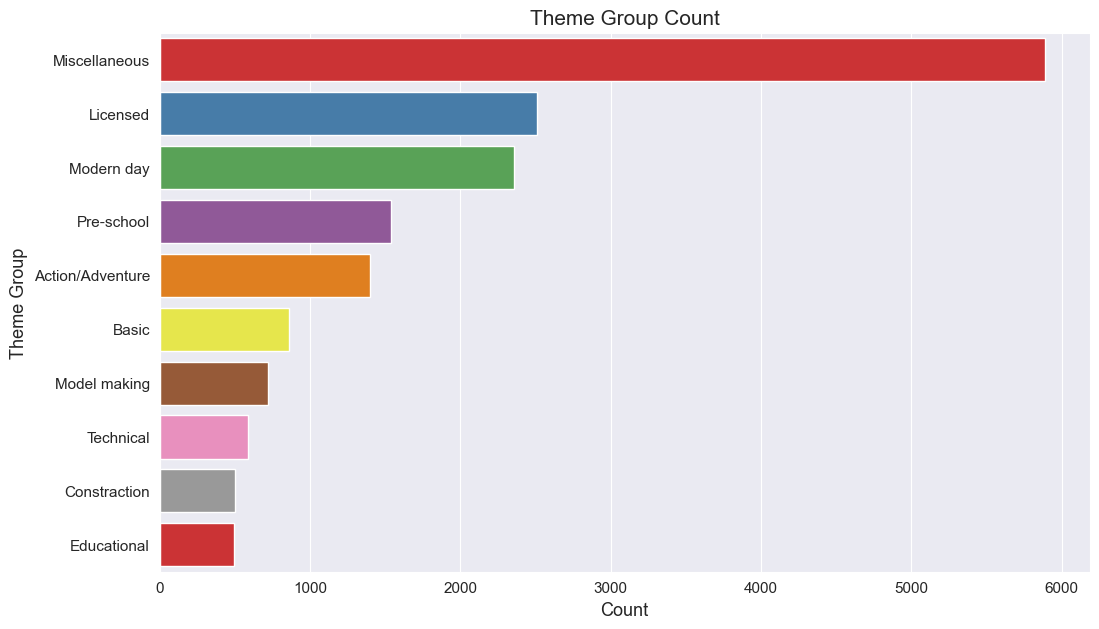

In [43]:
theme_group_counts = df['themeGroup'].value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.countplot(y='themeGroup', data=df, order=theme_group_counts.index, palette='Set1')
plt.title('Theme Group Count', fontsize=15)
plt.xlabel('Count', fontsize=13)
plt.ylabel('Theme Group', fontsize=13)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()


### Category 

In [44]:
df['category'].nunique()

7

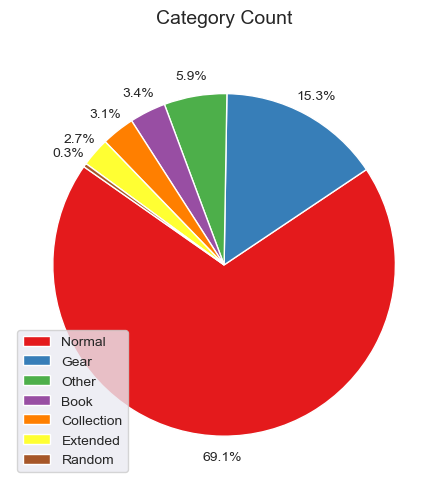

In [45]:
category_counts = df['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 5))
pie = plt.pie(category_counts, labels=None, autopct='%1.1f%%', startangle=145, pctdistance=1.12, colors=sns.color_palette('Set1'))
plt.title('Category Count', fontsize=14, pad = 20) 
plt.tight_layout()
plt.legend(category_counts.index, loc='best')
plt.show()


## Bivariate Analysis 

Calculating the pairwise correlation between columns of a data frame:

In [46]:
df.corr(numeric_only = True).apply(lambda s: s.apply('{0:.2f}'.format))

,year,pieces,minifigs,agerange_min,US_retailPrice
year,1.00,0.16,0.05,0.16,0.13
pieces,0.16,1.00,0.48,0.64,0.87
minifigs,0.05,0.48,1.00,0.35,0.54
agerange_min,0.16,0.64,0.35,1.00,0.59
US_retailPrice,0.13,0.87,0.54,0.59,1.00


In [47]:
df_corr = df[['pieces', 'minifigs', 'agerange_min', 'US_retailPrice']].corr()

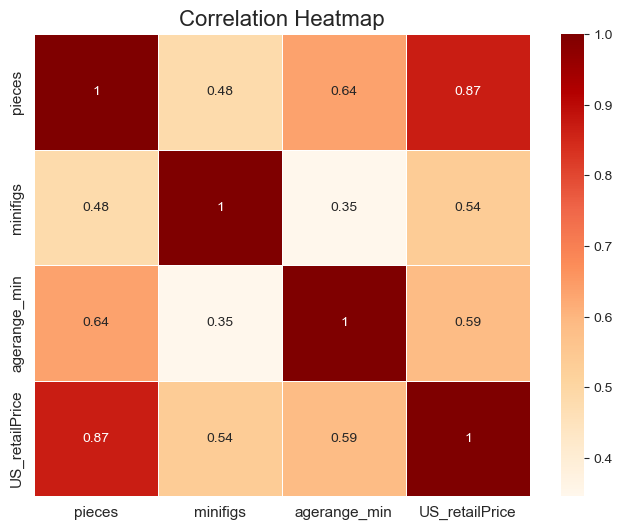

In [48]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(df_corr, annot=True, cmap="OrRd", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize = 16)
plt.xticks(fontsize = 11)
plt.yticks(fontsize = 11)
plt.show()

### Price, USD vs Pieces 

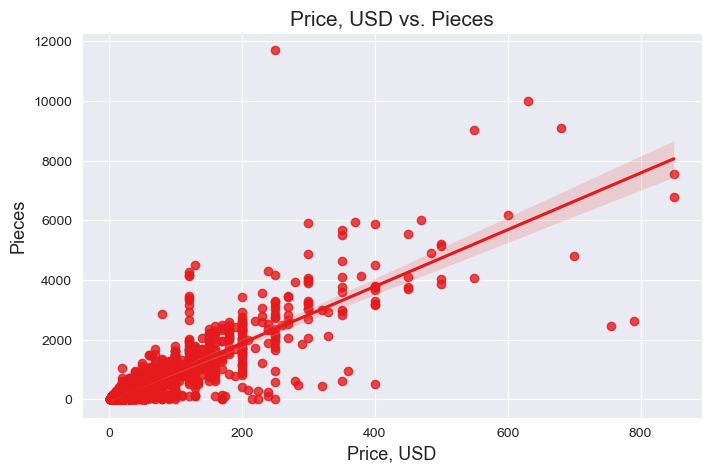

In [49]:
plt.figure(figsize=(8, 5))
sns.regplot(x='US_retailPrice', y='pieces', data=df)
plt.title('Price, USD vs. Pieces', fontsize=15)
plt.xlabel('Price, USD', fontsize=13)
plt.ylabel('Pieces', fontsize=13)
plt.show()

Very strong positive correlation between Price, USD and Pieces.

### Pieces vs Age 

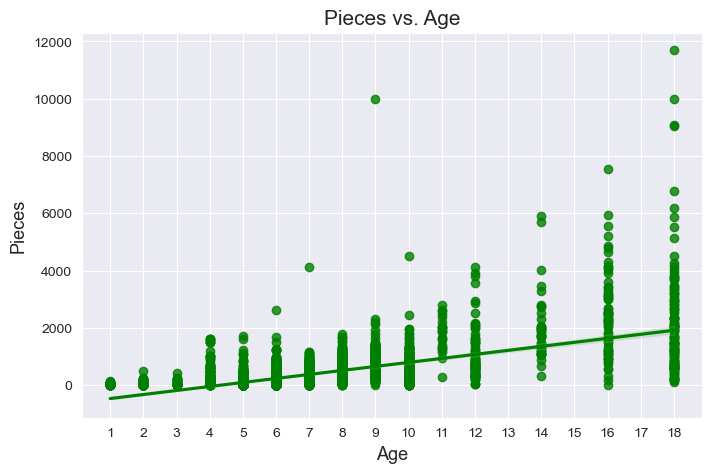

In [50]:
plt.figure(figsize=(8, 5))
sns.regplot(x='agerange_min', y='pieces', data=df, color = '#008000')
plt.title('Pieces vs. Age', fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Pieces', fontsize=13)
plt.xticks(np.arange(1, 19))  
plt.show()

Despite a correlation coefficient of 0.64, the regression line for Pieces and Age lacks steep inclination. Age's discrete nature explains why data points tend to cluster around specific age values. Substituting Pieces with the average contributed to a clearer depiction of the linear relationship between Pieces and Age.

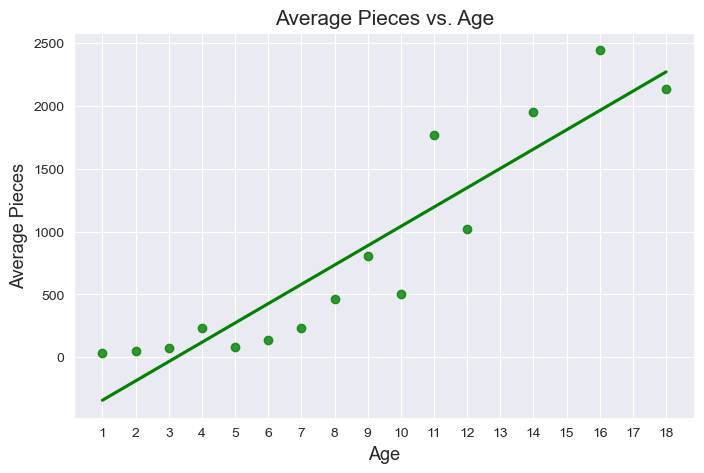

In [51]:
plt.figure(figsize=(8, 5))
avg_pieces = df.groupby('agerange_min')['pieces'].mean().reset_index()
sns.regplot(x='agerange_min', y='pieces', data=avg_pieces, color = '#008000', ci = None)
plt.title('Average Pieces vs. Age', fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Average Pieces', fontsize=13)
plt.xticks(np.arange(1, 19)) 
plt.show()

### Price, USD vs Age 

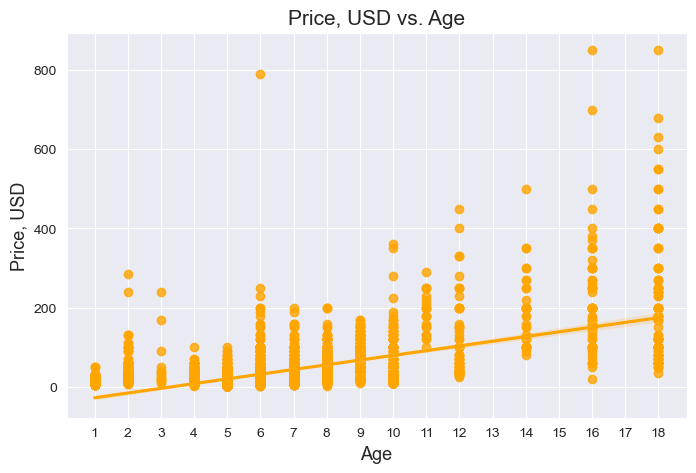

In [52]:
plt.figure(figsize=(8, 5))
sns.regplot(x='agerange_min', y='US_retailPrice', data=df, color = '#FFA500')
plt.title('Price, USD vs. Age', fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Price, USD', fontsize=13)
plt.xticks(np.arange(1, 19))  
plt.show()

A similar scenario was observed for Price, USD and Age, with a correlation coefficient of 0.59. Age being a discrete variable led to data points clustering around specific values. Substituting the average for Price further enhanced the clarity of the linear relationship between Price and Age.

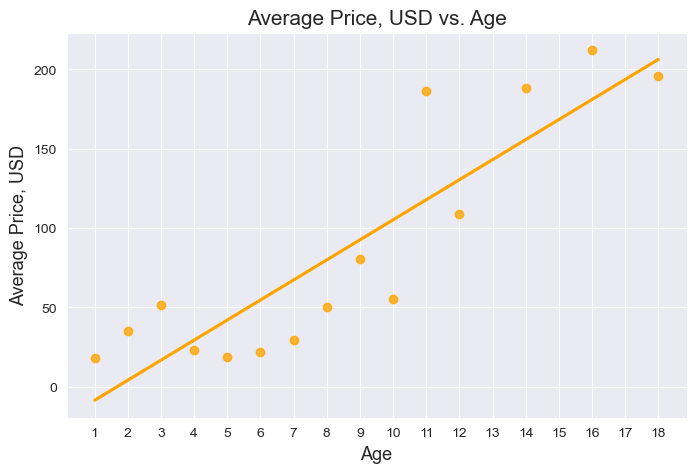

In [53]:
plt.figure(figsize=(8, 5))
avg_price = df.groupby('agerange_min')['US_retailPrice'].mean().reset_index()
sns.regplot(x='agerange_min', y='US_retailPrice', data=avg_price, color='#FFA500', ci = None)
plt.title('Average Price, USD vs. Age', fontsize=15)
plt.xlabel('Age', fontsize=13)
plt.ylabel('Average Price, USD', fontsize=13)
plt.xticks(np.arange(1, 19)) 
plt.show()

### Minifigs vs Price, USD 

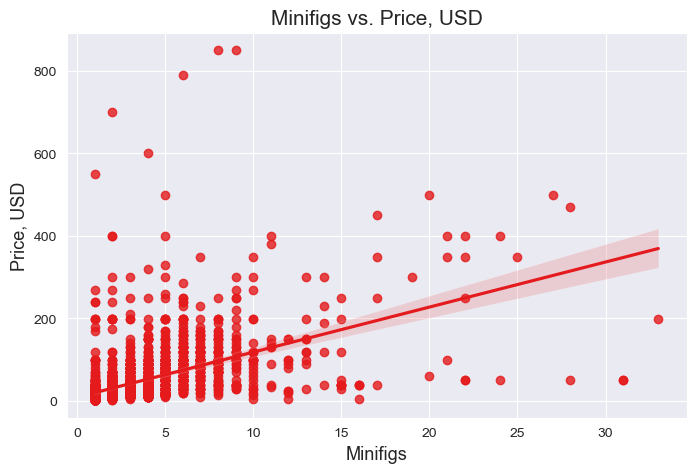

In [54]:
plt.figure(figsize=(8, 5))
sns.regplot(x='minifigs', y='US_retailPrice', data=df)
plt.title('Minifigs vs. Price, USD', fontsize=15)
plt.xlabel('Minifigs', fontsize=13)
plt.ylabel('Price, USD', fontsize=13)
 
plt.show()

Moderate correlation between Minifigs and Price, USD, correlation coefficient: 0.54.

### Price, USD vs Theme Group 

In [55]:
theme_data = df[['themeGroup', 'US_retailPrice']]
theme_data.dropna(inplace = True)

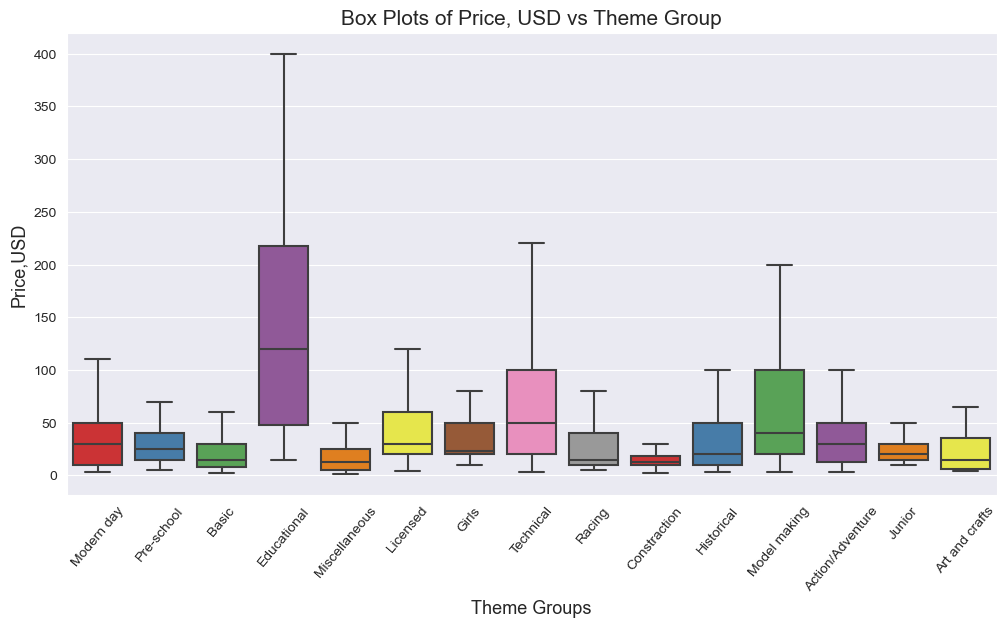

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=theme_data['themeGroup'], y=theme_data['US_retailPrice'], data=theme_data,  showfliers = False, palette = 'Set1')  

plt.title('Box Plots of Price, USD vs Theme Group', fontsize=15)
plt.xlabel('Theme Groups', fontsize=13)
plt.ylabel('Price,USD', fontsize=13)
plt.xticks(fontsize = 10, rotation = 50)
plt.show()

### Pieces vs Theme Group 

In [57]:
theme_data1 = df[['themeGroup', 'pieces']]
theme_data1.dropna(inplace = True)

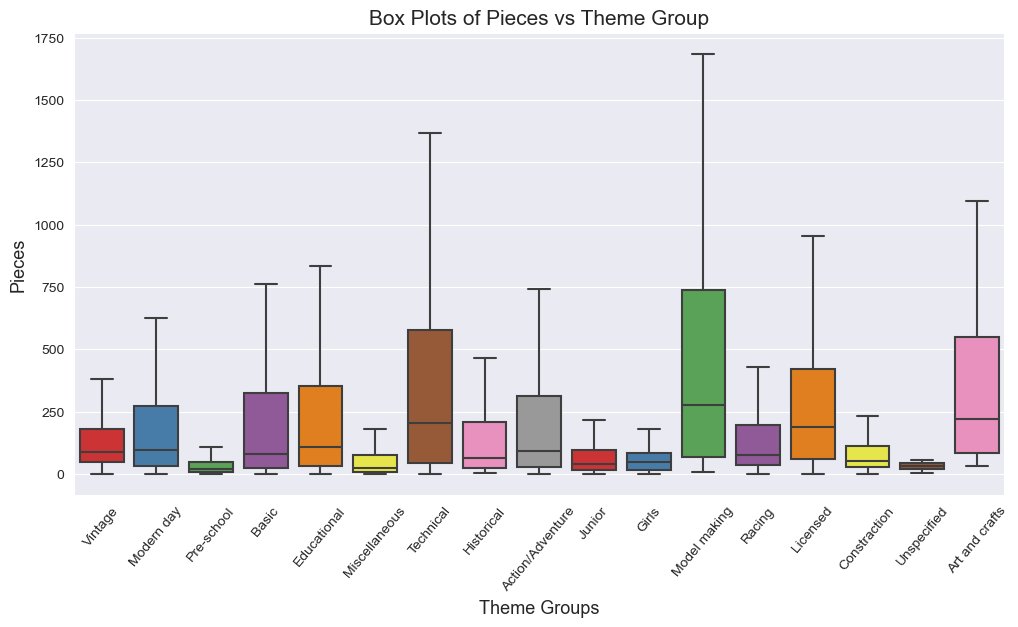

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=theme_data1['themeGroup'], y=theme_data1['pieces'], data=theme_data1,  showfliers = False, palette = 'Set1')  

plt.title('Box Plots of Pieces vs Theme Group', fontsize=15)
plt.xlabel('Theme Groups', fontsize=13)
plt.ylabel('Pieces', fontsize=13)
plt.xticks(fontsize = 10, rotation = 50)
plt.show()

### Minifigs vs Theme Group 

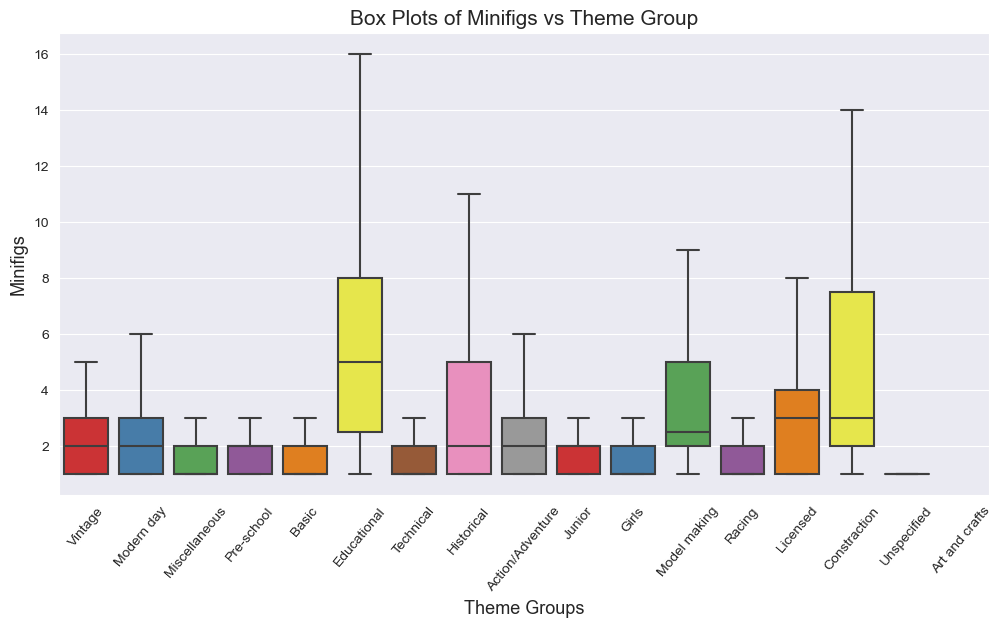

In [59]:
theme_data2 = df[['themeGroup', 'minifigs']]
theme_data2.dropna(inplace = True)

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['themeGroup'], y=df['minifigs'], data=theme_data2, showfliers = False, palette = 'Set1')  

plt.title('Box Plots of Minifigs vs Theme Group', fontsize=15)
plt.xlabel('Theme Groups', fontsize=13)
plt.ylabel('Minifigs', fontsize=13)
plt.xticks(fontsize = 10, rotation = 50)
plt.show()

### Data Inquiries

#### Top ten themes by years of presence. 

In [60]:
theme_dates = df.groupby('theme')['year'].agg(['min', 'max']).reset_index()
theme_dates['year_difference'] = theme_dates['max'] - theme_dates['min']
top_10_themes_year_diff = theme_dates.nlargest(10, 'year_difference').set_index('theme')

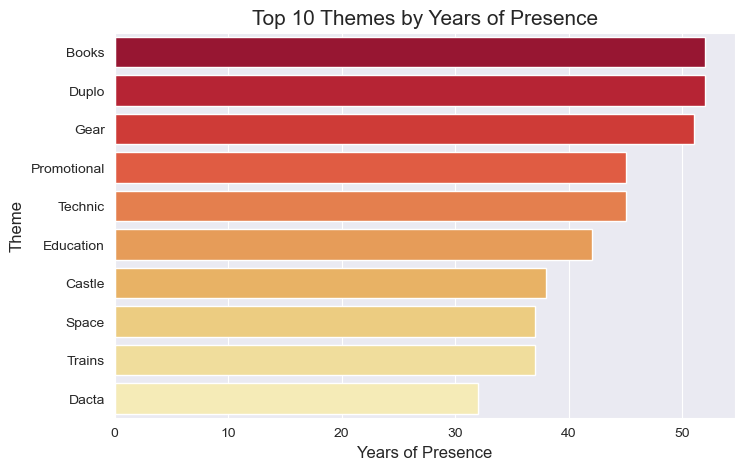

In [61]:
plt.figure(figsize=(8, 5))
sns.barplot(x='year_difference', y=top_10_themes_year_diff.index, data=top_10_themes_year_diff, palette='YlOrRd_r')
plt.xlabel('Years of Presence', fontsize = 12)
plt.ylabel('Theme', fontsize = 12)
plt.title('Top 10 Themes by Years of Presence', fontsize = 15)
plt.show()


#### LEGOLAND theme years of presence. 

In [62]:
legoland_dates = theme_dates[theme_dates['theme'] == 'LEGOLAND']
print("Release Year of the LEGOLAND theme:", legoland_dates['min'].values[0])
print("Termination Year of the LEGOLAND theme:", legoland_dates['max'].values[0])
print("Years of LEGOLAND Theme Presence:", legoland_dates['year_difference'].values[0])


Release Year of the LEGOLAND theme: 1970
Termination Year of the LEGOLAND theme: 1978
Years of LEGOLAND Theme Presence: 8


#### LEGO Themes with the most minifigures. 

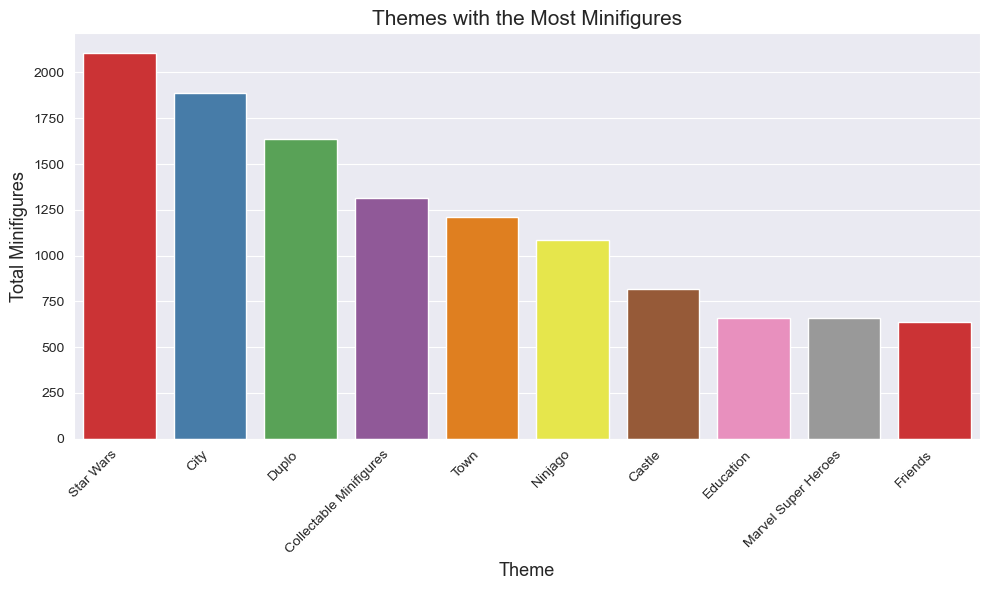

In [63]:
theme_minifigs = df.groupby('theme')['minifigs'].sum()
top_themes = theme_minifigs.nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_themes, x='theme', y='minifigs', palette='Set1')
plt.title('Themes with the Most Minifigures', fontsize=15)
plt.xlabel('Theme', fontsize=13)
plt.ylabel('Total Minifigures', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Conclusion 

<p> In this project, a comprehensive analysis and visualization of the LEGO dataset were conducted. Various features such as 'Pieces', 'Price, USD', 'Age', 'Minifigs', 'Product Name', 'Theme Group', and more were explored. The analysis revealed the presence of outliers in almost all numeric variables, highlighting the need for further investigation.

Furthermore, the correlation analysis unveiled several interesting insights. A strong positive correlation between 'Pieces' and 'Price, USD' was discovered. Additionally, moderate correlations were found between 'Age' and 'Price, USD', 'Age' and 'Pieces', as well as 'Minifigs' and 'Price, USD'. At the end of the analysis, several questions regarding the dataset were addressed through visualizations and data exploration. These findings serve as a valuable foundation for future research and strategic decision-making concerning LEGO products.

#### Author: Svetlana Sedykh, 2024-03-28 